## Tarefa Associação e Regressão tilha 04

Anderson rosa cascalho

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Analise exploratória dos dados

In [ ]:
data = {
    'Idade': [16,25,39,45,49,64,70], 
    'PressaoSistolica': [109,122,143,132,199,185,199]
}

dataFrame = pd.DataFrame(data)

In [ ]:
dataFrame.shape

(7, 2)

In [ ]:
dataFrame.head(7)

,Idade,PressaoSistolica
0,16,109
1,25,122
2,39,143
3,45,132
4,49,199
5,64,185
6,70,199


In [ ]:
dataFrame.describe()

,Idade,PressaoSistolica
count,7.000000,7.000000
mean,44.000000,155.571429
std,19.459359,37.964269
min,16.000000,109.000000
25%,32.000000,127.000000
50%,45.000000,143.000000
75%,56.500000,192.000000
max,70.000000,199.000000


## Gráfico de dispersão dos dados

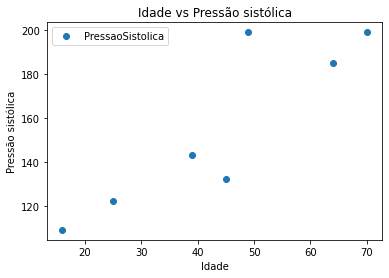

In [ ]:
dataFrame.plot(x='Idade', y='PressaoSistolica', style='o')
plt.title('Idade vs Pressão sistólica')
plt.xlabel('Idade')
plt.ylabel('Pressão sistólica')
plt.show()

## Quais foram suas observações? Há correlação entre os dados?


In [ ]:
from scipy.stats.stats import pearsonr
print('Correlação: %0.5f' % pearsonr(dataFrame['Idade'], dataFrame['PressaoSistolica'])[0])

Correlação: 0.88346


Olhando para os dados no gráfico e também a correlação linear, podemos identificar que existe um boa correlação entre os dados, temos um percentual de 88% de correlação. Podemos identificar também que temos uma correlação imperfeita possitiva, pois os dados estão crescendo porém não é uma linha perfeitamente linear.


## Extraindo os dados entre atributos e rotulos 
Atributos = variaveis independentes


---


Rotulos = varias dependentes cujos valores devem ser previstos

In [ ]:
#Os atributos são armazenados na variável X.
#Especificamos “-1” como o intervalo para colunas, pois
#queríamos que nosso conjunto de atributos contivesse
#todas as colunas, exceto a última, que é “Pressão_
#Sanguinea”. Da mesma forma, a variável y contém os
#rótulos. Especificamos 1 para a coluna de rótulo, pois o
#índice da coluna “Pressão_Sanguinea” é 1. Lembre-se
#de que os índices da coluna começam com 0, sendo 1 a
#segunda coluna;

atributos = dataFrame.iloc[:, :-1].values
rotulos = dataFrame.iloc[:, 1].values

print('Atributos: ', atributos)
print('Rotulos: ', rotulos)

Atributos:  [[16]
 [25]
 [39]
 [45]
 [49]
 [64]
 [70]]
Rotulos:  [109 122 143 132 199 185 199]


Dividir esses dados em conjuntos de treinamento
e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(atributos, rotulos, test_size=0.2, random_state=0)

Criando modelo e treinando

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtenha a inclinação e o intercepto, e a equação da reta de regressão

In [ ]:
print("Intecepto: ", regressor.intercept_)
print("Inclinação: ", regressor.coef_)

Intecepto:  79.76342055570544
Inclinação:  [1.7496628]


Equação da reta

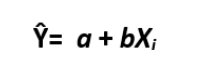

In [ ]:
valorX = 24
previsao = regressor.intercept_ + (regressor.coef_ * valorX)
print('Previsão: %0.3f' % previsao)

Previsão: 121.755


Podemos identificar acima que a previsão se aproxima muito bem da tabela real.
Na tabela real o valor para 25 anos é de 122, já para 24 anos é de 121.755

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Esperado': y_test, 'Previsto': y_pred})
df

,Esperado,Previsto
0,199,202.239817
1,143,148.000270


## Faça a avaliação da qualidade do modelo de regressão linear.

In [ ]:
from sklearn import metrics 

print('MAE - Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE - Mean Absolute Error:  4.12004316158621
MSE - Mean Squared Error:  17.749554517736463
RMSE - Root Mean Squared Error:  4.213022017238512
R2: 0.9773602620947239
